# **AIRLINE PASSENGER SATISFICATION**
<hr>

# **Latar Belakang**

Sebuah maskapai penerbangan melakukan survei mengenai kepuasan pelanggan. Maskapai ini perlu mengetahui bgaimana tingkat kepuasan pelanggan dari survey yang telah dilakukan.

<br>

# **Pernyataan Masalah**

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:<br>
**Faktor apa saya yang berkorelasi dengan dengan kepuasan pelanggan?**

<br>

# **Data**

Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction). 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait data pelanggan, data perjalanan dan kondisi pelayanan yang diisi ketika pelanggan memesan tiket sampai tiba di tempat tujuan. <br>
Ada 24 kolom di dalam dataset `airline passanger satisfication`, yaitu:  
* id: Passanger ID
* Gender: Gender of the passengers (Female, Male)
* Customer Type: The customer type (Loyal customer, disloyal customer)
* Age: The actual age of the passengers
* Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
* Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
* Flight distance: The flight distance of this journey
* Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
* Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
* Ease of Online booking: Satisfaction level of online booking
* Gate location: Satisfaction level of Gate location
* Food and drink: Satisfaction level of Food and drink
* Online boarding: Satisfaction level of online boarding
* Seat comfort: Satisfaction level of Seat comfort
* Inflight entertainment: Satisfaction level of inflight entertainment
* On-board service: Satisfaction level of On-board service
* Leg room service: Satisfaction level of Leg room service
* Baggage handling: Satisfaction level of baggage handling
* Check-in service: Satisfaction level of Check-in service
* Inflight service: Satisfaction level of inflight service
* Cleanliness: Satisfaction level of Cleanliness
* Departure Delay in Minutes: Minutes delayed when departure
* Arrival Delay in Minutes: Minutes delayed when Arrival
* Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


Berikut 5 baris teratas dan terbawah dari dataset hr_analitycs.

In [52]:
df=pd.read_csv('./airline passanger satisfaction.csv').drop('Unnamed: 0', axis= 1)
display(df.head(),df.tail())

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


<br>

# **Data Understanding and Cleaning**

Berikut merupakan informasi dari dataset `airline passanger statisfication`.

In [53]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (103904, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-n

In [54]:
display(df.describe(), df.describe(include='object'))

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [55]:
pd.set_option('display.max_colwidth', -1)
# Data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, ...]"
1,Gender,2,"[Male, Female]"
2,Customer Type,2,"[Loyal Customer, disloyal Customer]"
3,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
4,Type of Travel,2,"[Personal Travel, Business travel]"
5,Class,3,"[Eco Plus, Business, Eco]"
6,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
7,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
8,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"
9,Ease of Online booking,6,"[3, 2, 5, 4, 1, 0]"


Secara umum, kita bisa melihat bahwa:
* dataset hr_analytics memiliki 24 kolom dan 103,904 baris
* kolom `Arrival Delay in Minutes` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `id` berisikan id unik untuk tiap pelanggan, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
* kolom `Departure Delay in Minutes` memiliki range data yang cukup besar, dari 0-1592. Maka butuh waktu 26 jam 32 menit uatau 1 hari 2 jam 32 menit untuk delay terlama. Angka ini masih cukup masuk akal, sehingga tidak perlu dilakukan apa-aoa terhadap kolom ini.
* kolom `Arrival Delay in Minutes` memiliki range data yang cukup besar, dari 0-1584. Maka butuh waktu 26 jam 24 menit uatau 1 hari 2 jam 24 menit untuk delay terlama. Angka ini masih cukup masuk akal, sehingga tidak perlu dilakukan apa-aoa terhadap kolom ini.

## Missing Value

In [56]:
# Persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

<AxesSubplot:>

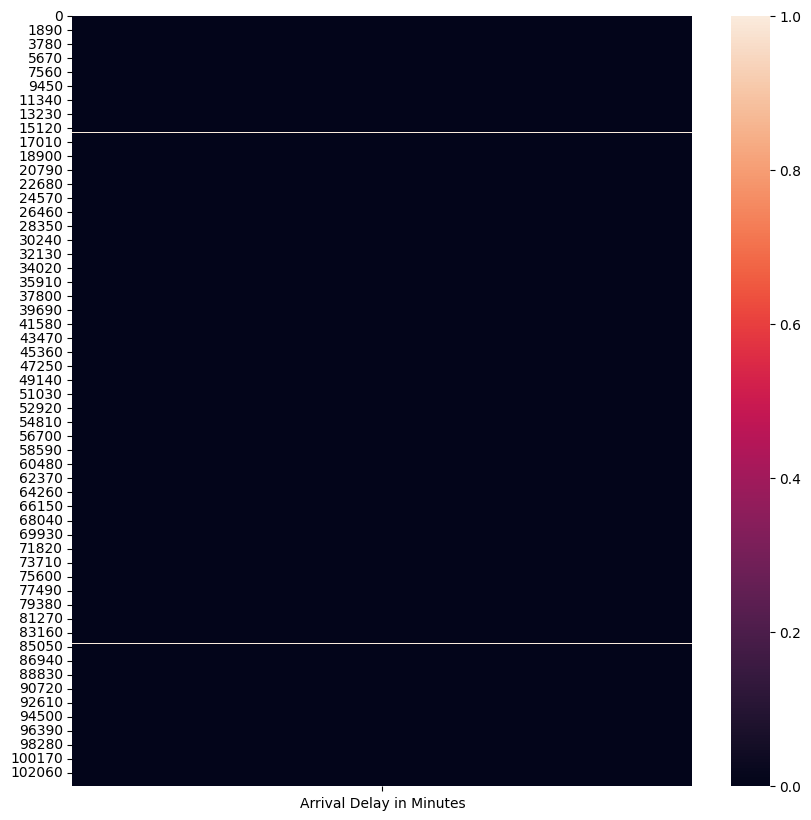

In [57]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['Arrival Delay in Minutes']].isna())

Secara garis besar:  
* *missing value* di kolom `Arrival Delay in Minutes` memiliki proporsi yang cukup tinggi (>10%), dengan missing value mencapai 29.83%.

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan dalam kasus kita, karena jumlah missing value yang tergolong cukup tinggi (sampai 29%).
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. 

## Column: `Arrival Delay in Minutes`

Kolom `Arrival Delay in Minutes` memiliki *missing value* dengan proporsi 0.29%

In [58]:
df[['Arrival Delay in Minutes']].isna().sum()

Arrival Delay in Minutes    310
dtype: int64

Terdapat 310 data kosong pada kolom `Arrival Delay in Minutes`. <br>
Pertama, akan dicari apakah data kosong berasal dari ketidakterlambatan keberangkatan.

In [59]:
# Jumlah pelanggan dengan data kosong di 'Arrival Delay in Minutes' berdasarkan 'Departure Delay in Minutes'
display(df[(df['Arrival Delay in Minutes'].isna()) & (df['Departure Delay in Minutes'] == 0)]['Departure Delay in Minutes'].value_counts())

0    116
Name: Departure Delay in Minutes, dtype: int64

Terdapat sebagian pelanggan yang tidak mengalami keterlambatan keberangkatan. <br>
Kita dapat berasumsi bahwa pelanggan yang tidak mengalami keterlambatan kedatangan disebabkan karena tidak terlambat dalam keberangkatan. <br>
Maka dari itu untuk kelompok data dengan nilai kolom `Departure Delay in Minutes` sebesar 0, nilai kolom `Arrival Delay in Minutes` akan diubah menjadi 0.

In [60]:
df.loc[(df['Arrival Delay in Minutes'].isna()) & (df['Departure Delay in Minutes'] == 0),'Arrival Delay in Minutes'] = 0

In [61]:
#Jumlah data kosong setelah pengisian
df[['Arrival Delay in Minutes']].isna().sum()

Arrival Delay in Minutes    194
dtype: int64

In [62]:
df['Arrival Delay in Minutes'].isna().sum()/df.shape[0]*100

0.18671080997844164

Tersisa 194 data kosong dengan proporsi 0.18% dari keseluruhan data. <br>
Trlebih dahulu kan dicari korelasi antara data pada kolom `Arrival Delay in Minutes` dan `Departure Delay in Minutes`.

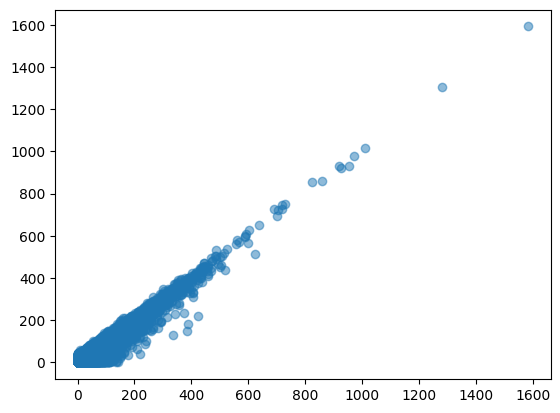

In [63]:
plt.scatter(df['Arrival Delay in Minutes'], df['Departure Delay in Minutes'], alpha = 0.5)

In [64]:
df[['Arrival Delay in Minutes', 'Departure Delay in Minutes']].corr(method = 'pearson')

,Arrival Delay in Minutes,Departure Delay in Minutes
Arrival Delay in Minutes,1.000000,0.965487
Departure Delay in Minutes,0.965487,1.000000


Dari diagram diatas dan perhitungan dapat disimpulkan bahwa nilai pada `Departure Delay in Minutes` dan `Arrival Delay in Minutes` sangat saling berkaitan satu sama lain. <br>
Maka dari itu, dapat diasumsikan bahwa kedua variabel tersebut akan memiliki pengaruh yang sama terhada kepuasan pelanggan. <br>
Maka dari itu, data kosong tersisa akan diisi dengan data dari kolom `Departure Delay in Minutes`.

In [65]:
# Mengubah data menjadi median
df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'], inplace = True)

In [66]:
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Column: `id`

kolom `id` berisikan id unik untuk tiap pelanggan sehingga tidak relevan dalam analisis dan bisa dihapus.

In [67]:
df.drop(columns=['id'],inplace=True)

## Cleaned Data

Berikut adalah sekilas informasi dari data yang sudah dibersihkan

In [68]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(103904, 23)


,dataFeatures,dataType,null,unique,uniqueSample
0,Gender,object,0,2,"[Female, Male]"
1,Customer Type,object,0,2,"[Loyal Customer, disloyal Customer]"
2,Age,int64,0,75,"[49, 61]"
3,Type of Travel,object,0,2,"[Personal Travel, Business travel]"
4,Class,object,0,3,"[Business, Eco Plus]"
5,Flight Distance,int64,0,3802,"[1835, 1321]"
6,Inflight wifi service,int64,0,6,"[3, 1]"
7,Departure/Arrival time convenient,int64,0,6,"[2, 5]"
8,Ease of Online booking,int64,0,6,"[3, 4]"
9,Gate location,int64,0,6,"[2, 0]"


Jumlah data sebelum dan sesudah diberihkan tetap yaitu sebesar 103,904 baris data.

<br>

# **Data Analysis**

Akan dilakukan beberapa analisis untuk mencari tahu **faktor yang mempengaruhi kepuasan pelanggan**. <br>
Analisis ini akan dilakukan dengan membandingkan data pelanggan yang puas (`satisfaction`= 'satisfied') dan tidak puas (`satisfaction`= 'neutral or dissatisfied') berdasarkan fitur yang tersedia. <br>
Dari keseluruhan data, jumlah pelanggan tidak puas lebih besar dengan jumlah 58,879. Namun, proporsi antara pelanggan yang puas dan tidak puas cukup seimbang. Perbandingan pada data kategorikal lebih baik dilakukan berdasarkan ratio.

In [69]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

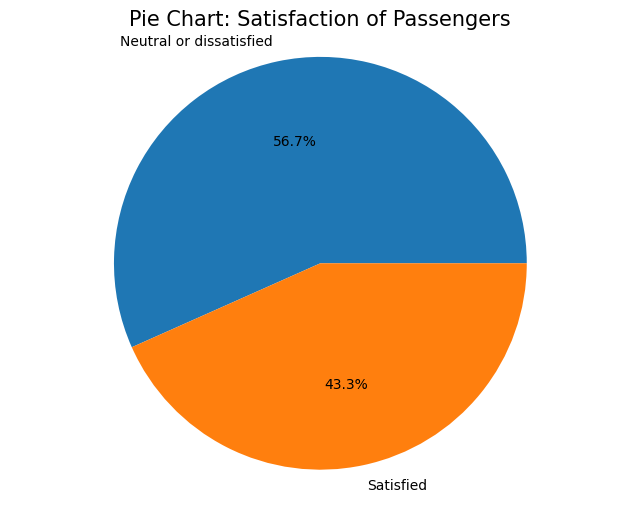

In [70]:
plt.figure(figsize= (8,6))                                          
plt.pie(df['satisfaction'].value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], autopct = '%1.1f%%')
plt.title('Pie Chart: Satisfaction of Passengers', size = 15)   
plt.axis('equal')               
plt.show()

Analisis akan dibagi menjadi beberapa bagian yaitu:
* Berdasarkan tipe pelanggan
* Berdasarkan penilaian pelanggan
* Berdasarkan jarak dan waktu perjalanan
* Berdasarkan data pribadi pelanggan

## Berdasarkan tipe pelanggan:

Berikutnya, mari kita lihat fitur-fitur yang berkaitan dengan tipe pelanggan, antara lain `Customer Type`, `Type of Travel` dan `Class`.  

Kita bisa menjawab pertanyaan-pertanyaan berikut dalam analisis kali ini:  
* Pelanggan mana yang mempunyai tingkat kepuasan tertinggi, pelanggan yang loyal atau tidak loyal?
* Pelanggan dengan tipe perjalanan mana yang mempunyai tingkat kepuasan tertinggi?
* Pelanggan dengan tingkat kepuasan tertinggi mengambil kelas perjalanan apa?

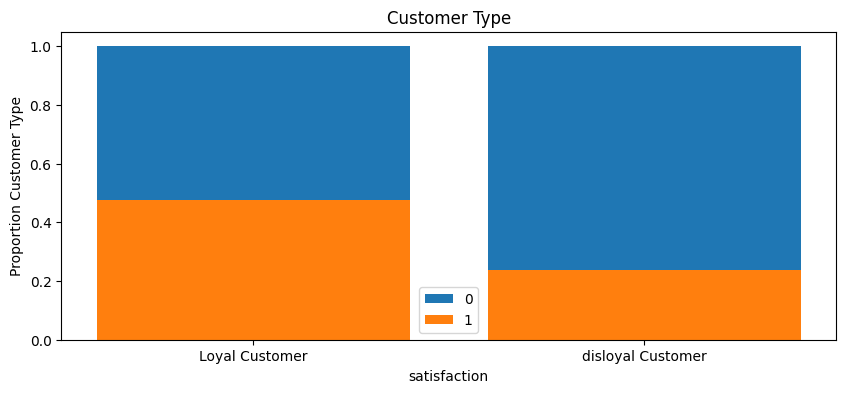

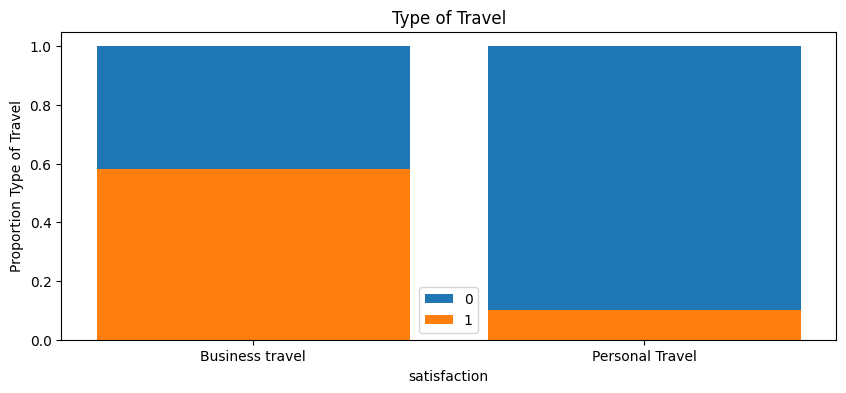

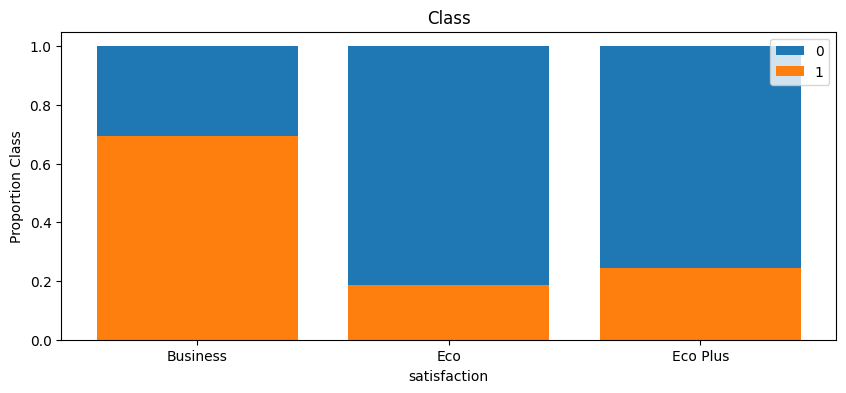

In [71]:
for i in ['Customer Type','Type of Travel','Class']:
    ct=pd.crosstab(df[i],df['satisfaction'],normalize='index').sort_index()
    ct['total']=ct.sum(axis=1)
    plt.figure(figsize=(10,4))
    plt.bar(np.arange(df[i].nunique()),ct['total'])
    plt.bar(np.arange(df[i].nunique()),ct['satisfied'])
    plt.xlabel('satisfaction')
    plt.ylabel(f'Proportion {i}')
    plt.legend([0,1])
    plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
    plt.title(i)
    plt.show()

In [72]:
for i in ['Customer Type','Type of Travel','Class']:
    fig=px.sunburst(df,path=[i,'satisfaction'],color='satisfaction', title=f'Proporsi Target Berdasarkan {i}')

    fig.show()

Dari grafik-grafik di atas, kita bisa menjawab pertanyaan:

* Pelanggan mana yang mempunyai tingkat kepuasan tertinggi, pelanggan yang loyal atau tidak loyal?
    * Secara proporsi dan jumlah, pelanggan yang loyal memiliki tingkat kepuasan tertinggi
* Pelanggan dengan tipe perjalanan mana yang mempunyai tingkat kepuasan tertinggi?
    * secara proporsi dan jumlah, pelanggan dalam perjalan bisnis memiliki tingkat kepuasan tertinggi
* Pelanggan dengan tingkat kepuasan tertinggi mengambil kelas perjalanan apa?
    * Proporsi kepuasan tertinggi berasal dari perjalanan kelas bisnis. Namun, jumlah penumpang kelas bisnis dan ekonomi cukup seimbang.


Hal ini bisa terjadi karena:
* Pelanggan yang berlangganan di maskapai ini didominasi oleh pelanggan loyal, mengambil kelas bisnis dan sedang dalam perjalanan bisnis.
* Maskapai lebih banyak melakukan survei pada penumpang elanggan loyal, kelas bisnis dan sedang dalam perjalanan bisnis. saja

Jika opsi kedua yang terjadi, maka survey selanjutnya harus dilakukan dengan lebih merata.

## Berdasarkan penilaian pelanggan:

Akan dianalisis pengaruh penilaian pelanggan terhadap tingkat kepuasan pelanggan. <br>
Akan dianalisis kolom 6-19 untuk menjawab beberapa pertanyaan.
* Faktor mana yang memiliki penilaian paling baik?
* Apakah faktor penilaian berhubungan dengan tingkat kepuasan pelanggan?

In [73]:
#Proporsi penilaian 'baik' pada setiap faktor (4-5)
df_sf = df[df.columns[6:20]].apply(pd.Series.value_counts)
df_sf.loc['%Satisfaction(4-5)'] = df_sf.loc[4] + df_sf.loc[5]
display((df_sf.T['%Satisfaction(4-5)']/df.shape[0]*100).sort_values(ascending=False))

Inflight service                     62.616454
Baggage handling                     62.090006
Seat comfort                         56.046928
Inflight entertainment               52.583154
On-board service                     52.466700
Leg room service                     51.447490
Online boarding                      49.540922
Cleanliness                          47.994302
Checkin service                      47.807592
Departure/Arrival time convenient    46.147405
Food and drink                       44.918386
Gate location                        36.865761
Ease of Online booking               32.166230
Inflight wifi service                30.088351
Name: %Satisfaction(4-5), dtype: float64

In [82]:
list(df[df.columns[6:20]])

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [78]:
#Rata-rata penilaian dari setiap faktor
df_rt = pd.DataFrame(data = list(df[df.columns[6:20]].apply(pd.Series.mean)), columns = ['Faktor', 'Rating'])
display(df_rt.sort_values(ascending=False))

ValueError: Shape of passed values is (14, 1), indices imply (14, 2)

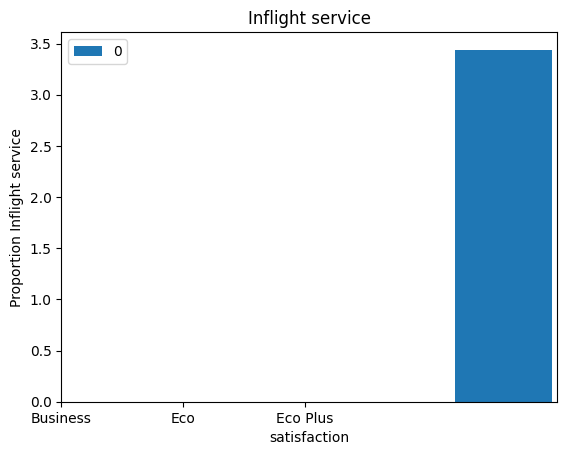

In [76]:
plt.bar(df_rt.sort_values(ascending=False)[1], df_rt.sort_values(ascending=False)[2])
plt.xlabel('satisfaction')
plt.ylabel(f'Proportion Inflight service')
plt.legend([0,1])
plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
plt.title('Inflight service')
plt.show()

Dari hasil cross tabulasi dan grafik di atas, kita bisa melihat faktor dengan penilaian 'baik' dihitung dari nilai 4-5 dan nilai rata-rata. <br>
Proporsi penilaian 'baik' memiliki hasil tertinggi (>60%) pada faktor `Inflight Service` (62.61%) dan `Baggage handling` (62.09%). <br>
Disamping itu, rata-rata penilaian tertinggi juga didapatkan pada faktor `Inflight Service` (3.64) dan `Baggage handling` (3.63). <br>
Maka dari itu, akan dicari hubungan antara faktor `Inflight Service` dan `Baggage handling` dengan `Satisfaction`.

Berikut adalah perbandingan `Inflight Service` dengan `Satisfaction`.

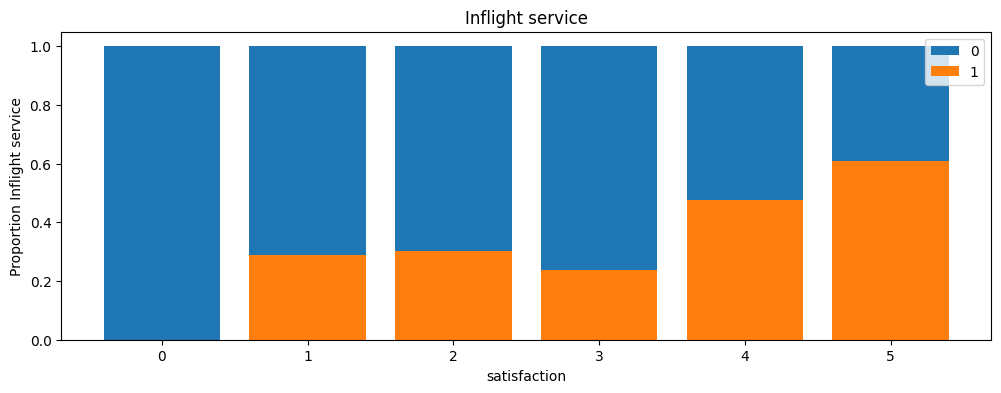

In [ ]:
ct=pd.crosstab(df['Inflight service'],df['satisfaction'],normalize='index').sort_index()
ct['total']=ct.sum(axis=1)
plt.figure(figsize=(12,4))
plt.bar(np.arange(df['Inflight service'].nunique()),ct['total'])
plt.bar(np.arange(df['Inflight service'].nunique()),ct['satisfied'])
plt.xlabel('satisfaction')
plt.ylabel(f'Proportion Inflight service')
plt.legend([0,1])
plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
plt.title('Inflight service')
plt.show()

In [ ]:
df_ct = pd.crosstab(df['Inflight service'], df['satisfaction'])
df_ct

satisfaction,neutral or dissatisfied,satisfied
Inflight service,,
0,3,0
1,5030,2054
2,8006,3451
3,15448,4851
4,19816,18129
5,10576,16540


In [ ]:
from scipy.stats import chi2_contingency

#Defining the table
stat, pvalue, dof, expected = chi2_contingency(df_ct)

#Conclusion
alpha = 0.05
print('p-value: ', pvalue)
if pvalue <= alpha:
    print('Dependent (tolak Ho)')
else:
    print('Independent (terima Ho)')

p-value:  0.0
Dependent (tolak Ho)


Berikut adalah perbandingan `Baggage handling` dengan `Satisfaction`.

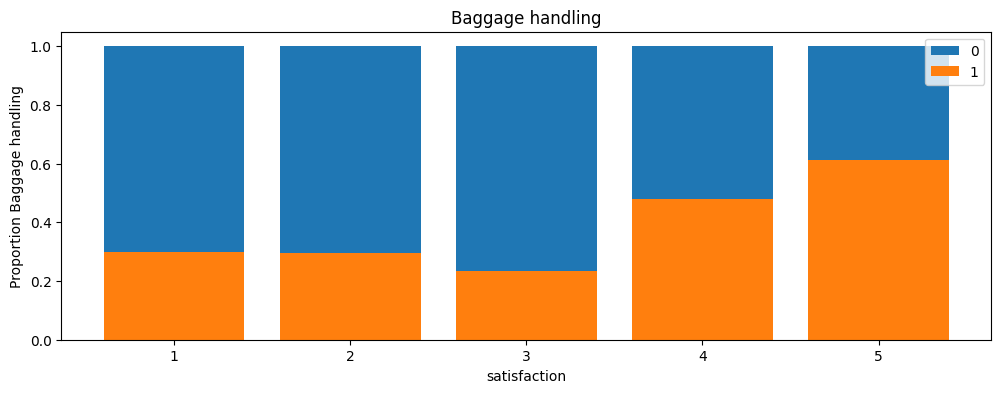

In [ ]:
ct=pd.crosstab(df['Baggage handling'],df['satisfaction'],normalize='index').sort_index()
ct['total']=ct.sum(axis=1)
plt.figure(figsize=(12,4))
plt.bar(np.arange(df['Baggage handling'].nunique()),ct['total'])
plt.bar(np.arange(df['Baggage handling'].nunique()),ct['satisfied'])
plt.xlabel('satisfaction')
plt.ylabel(f'Proportion Baggage handling')
plt.legend([0,1])
plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
plt.title('Baggage handling')
plt.show()

In [ ]:
df_ct = pd.crosstab(df['Baggage handling'], df['satisfaction'])
df_ct

satisfaction,neutral or dissatisfied,satisfied
Baggage handling,,
1,5083,2154
2,8117,3404
3,15766,4866
4,19405,17978
5,10508,16623


In [ ]:
from scipy.stats import chi2_contingency

#Defining the table
stat, pvalue, dof, expected = chi2_contingency(df_ct)

#Conclusion
alpha = 0.05
print('p-value: ', pvalue)
if pvalue <= alpha:
    print('Dependent (tolak Ho)')
else:
    print('Independent (terima Ho)')

p-value:  0.0
Dependent (tolak Ho)


Dari grafik, kita bisa melihat bahwa tingkat kepuasan meningkat seiring dengan penilaian `Inflight service` dan `Baggage handling`. <br> 
Hasil uji dengan *chi square* juga mengkonfirmasi bahwa tingkat kepuasan memiliki pengaruh terhadap penilaian `Inflight service` dan `Baggage handling`.

## Berdasarkan jarak dan waktu perjalanan:

Berikutnya, mari kita lihat fitur-fitur yang berkaitan dengan jarak dan waktu perjalanan, antara lain `Flight Distance`, `Departure Delay in Minutes` dan `Arrival Delay in Minutes`.  

Kita bisa menjawab pertanyaan-pertanyaan berikut dalam analisis kali ini:  
* Apakah ada hubungan antara kepuasan pelanggan dengan jarak perjalanan?
* Apakah ada hubungan antara kepuasan pelanggan dengan keterlambatan keberangkatan dan kedatangan?

Akan dibandingkan kolom `Arrival Delay in Minutes` dan `Departure Delay in Minutes` dengan `satisfaction`.

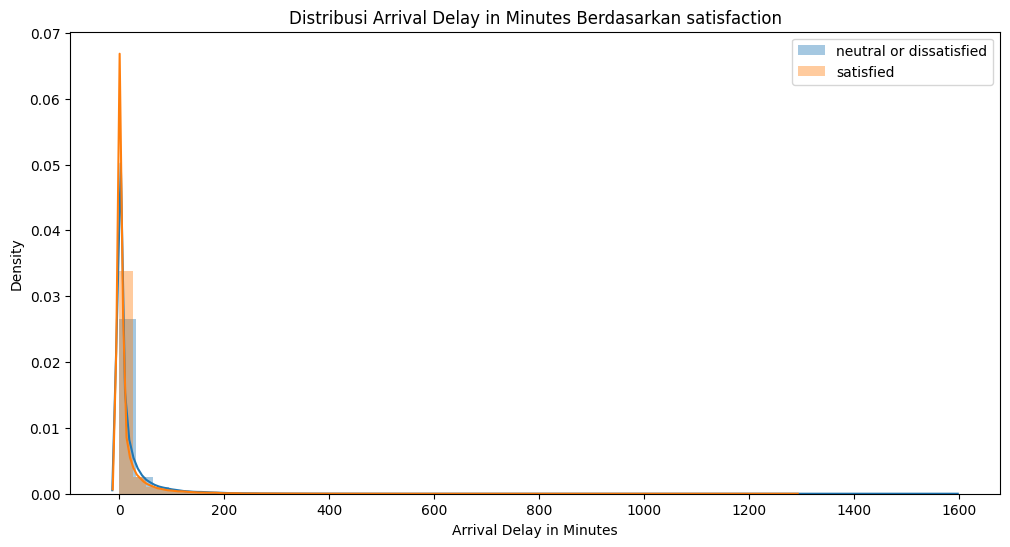

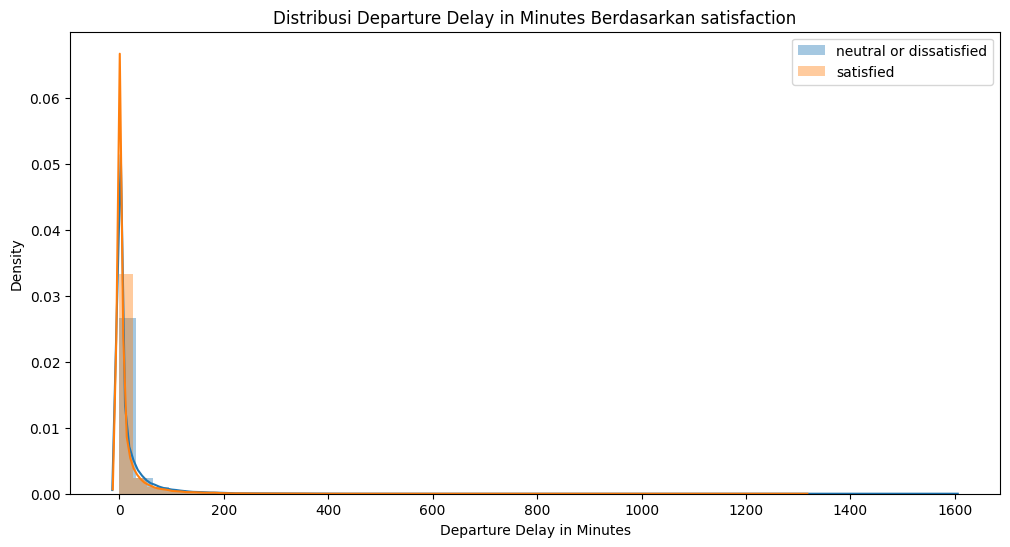

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['satisfaction']=='neutral or dissatisfied']['Arrival Delay in Minutes'],label='neutral or dissatisfied')
sns.distplot(df[df['satisfaction']=='satisfied']['Arrival Delay in Minutes'],label='satisfied')
plt.title('Distribusi Arrival Delay in Minutes Berdasarkan satisfaction')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
sns.distplot(df[df['satisfaction']=='neutral or dissatisfied']['Departure Delay in Minutes'],label='neutral or dissatisfied')
sns.distplot(df[df['satisfaction']=='satisfied']['Departure Delay in Minutes'],label='satisfied')
plt.title('Distribusi Departure Delay in Minutes Berdasarkan satisfaction')
plt.legend()
plt.show()

In [ ]:
pd.crosstab(df['Arrival Delay in Minutes']==0, df['satisfaction'])

satisfaction,neutral or dissatisfied,satisfied
Arrival Delay in Minutes,,
False,28148,17481
True,30731,27544


Dari hasil diagram diatas, dapat disimpulkan bahwa tingkat kepuasan pelanggan sangat tinggi saat tidak terjadi keterlambatan penerbangan. Hal ini sangat wajar untuk diterima.

Akan dibandingkan kolom `Flight Distance` dengan `satisfaction`.

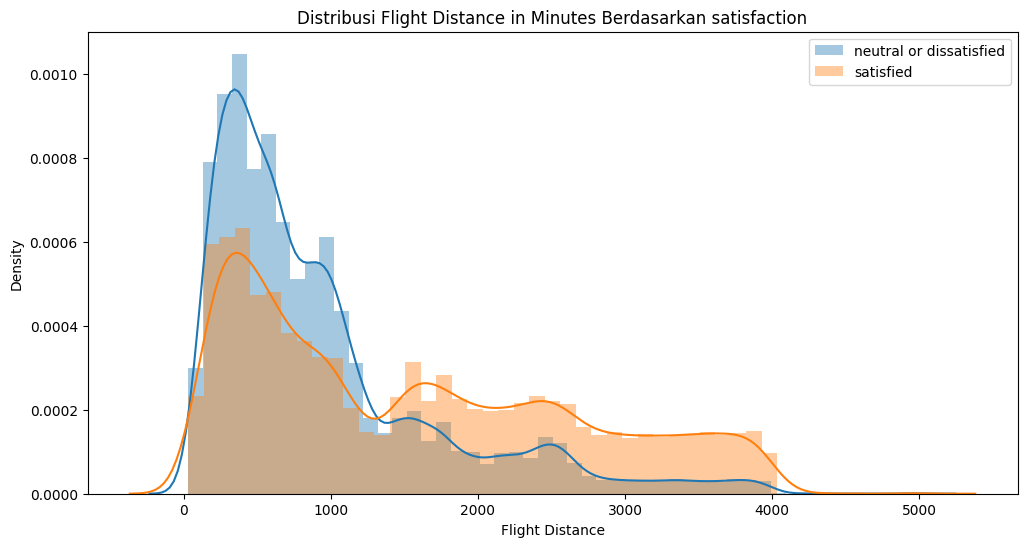

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['satisfaction']=='neutral or dissatisfied']['Flight Distance'],label='neutral or dissatisfied')
sns.distplot(df[df['satisfaction']=='satisfied']['Flight Distance'],label='satisfied')
plt.title('Distribusi Flight Distance in Minutes Berdasarkan satisfaction')
plt.legend()
plt.show()

Dari grafik diatas, dapat ditarik kesimpulan bahwa kepuasan pelanggan meningkat seiring dengan meningkatnya jarak perjalanan.<br>
Perlu dilakukan analisis mengenai kebenaran dari kondisi ini. <br>
Beberapa hal yang mungkin dapat menjadi faktor meningkatnya kepuasan pelanggan selama perjalanan, antara lain kelas perjalanan, hiburan dalam penerbangan dan ruang kaki. <br>

Berikut merupakan perbandingan kolom `Flight Distance` dengan `Class`.

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

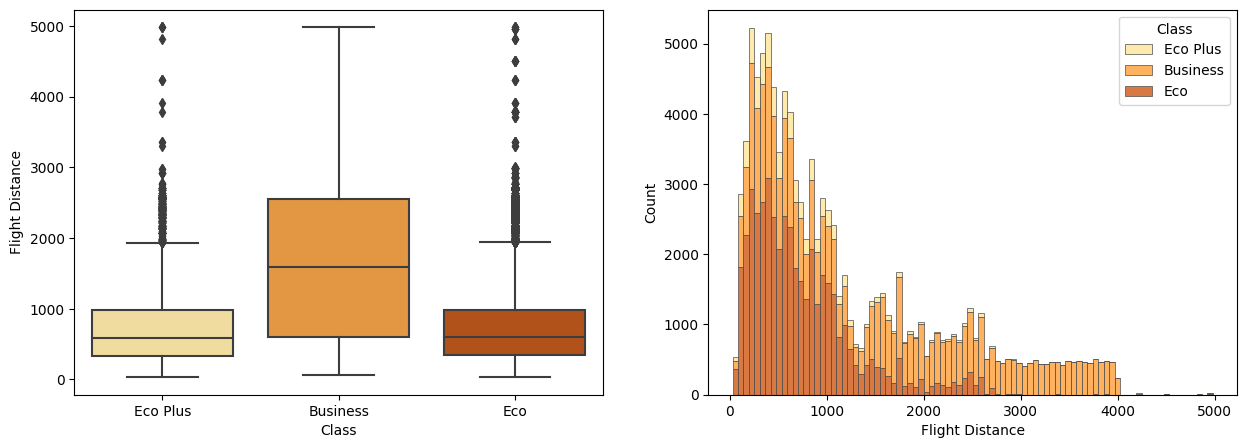

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])

Daridiagram diatas dapat disimpulkan bahwa pelanggan yang memiliki jarak tempuh panjang kebanyakan terbang dengan kelas bisnis.

Berikut merupakan perbandingan kolom `Flight Distance` dengan `Inflight Entertaiment` dan `Leg Room Service`.

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

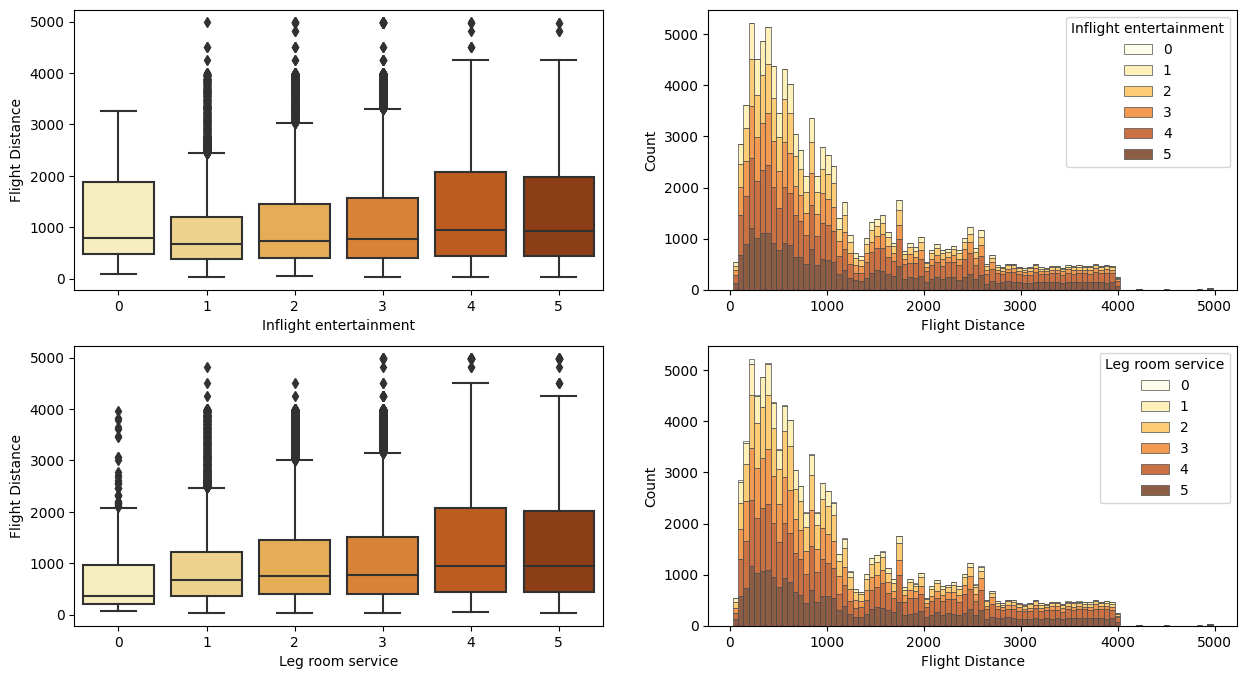

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "YlOrBr", data = df, ax = ax[0,0])
sns.histplot(df, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[0,1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "YlOrBr", data = df, ax = ax[1,0])
sns.histplot(df, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1,1])

Dari diagram diatas dapat disimpulkan bahwa semakin panjang perjalanan yang diambil oleh pelanggan makan semakin puas pelanggan dengan hiburan dalam pesawat serta ruang kaki tambahan. <br>
Akan dilihat apakah jarak perjalanan antara kedua kelompok berbeda secara signifikan atau tidak.

In [ ]:
# Cek distribusi kolom Flight Distance
from scipy.stats import normaltest
stats, pval=normaltest(df['Flight Distance'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho

tidak normal


In [ ]:
# Uji statistik, apakah ada perbedaan Flight Distance antara kedua jenis pelanggan
# karena distribusi data tidak normal, gunakan mann whitney
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['satisfaction']==i]['Flight Distance'] for i in df['satisfaction'].unique()], alternative='less')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Ternyata, memang ada perbedaan yang signifikan antara kepuasan pelanggan, dengan kandidat yang lebih puas terbang dengan jarak yang lebih jauh.

Maka dari itu, dapat disimpulkan bahwa:
* Ketepatan waktu perjalananan baik kedatangan ataupun keberangkatan berpengaruh pada kepuasan pelanggan
* Semakin panjang jarak perjalanan maka tingkat kepuasan pelanggan cenderung meningkat dikarenakan kelas perjalanan yang diambil, hiburan dalam pesawat serta ruang kaki tambahan.

## Berdasarkan data pribadi pelanggan:

Berikutnya, mari kita lihat fitur-fitur yang berkaitan dengan jarak dan waktu perjalanan, antara lain `Age` dan `Gender`.  

Kita bisa menjawab pertanyaan-pertanyaan berikut dalam analisis kali ini:  
* Apakah ada hubungan antara kepuasan pelanggan dengan umur?
* Apakah ada hubungan antara kepuasan pelanggan dengan gender?

Berikut merupakan perbandingan kolom `Age` dengan `satisfaction`.

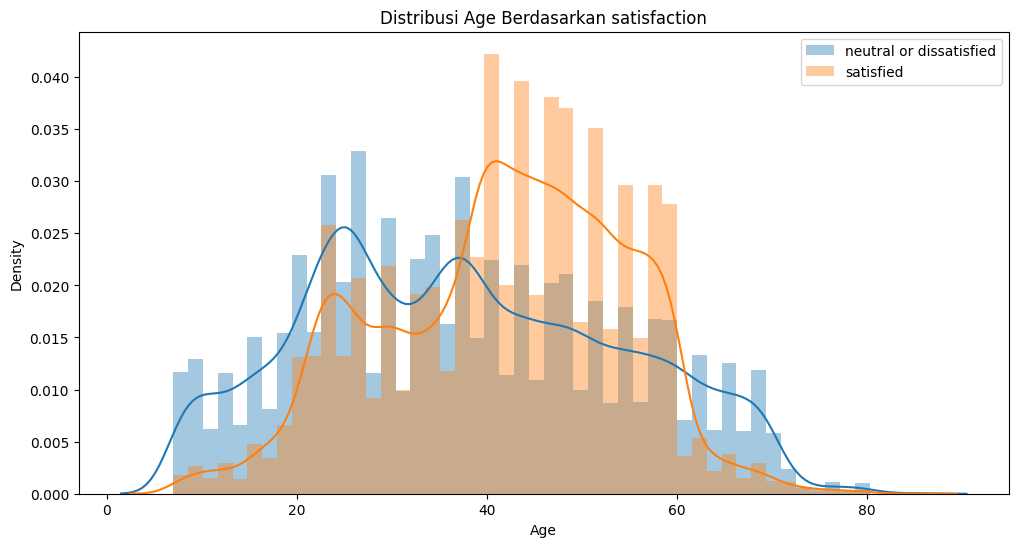

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['satisfaction']=='neutral or dissatisfied']['Age'],label='neutral or dissatisfied')
sns.distplot(df[df['satisfaction']=='satisfied']['Age'],label='satisfied')
plt.title('Distribusi Age Berdasarkan satisfaction')
plt.legend()
plt.show()

Dari diagram diatas didapati bahwa tingkat kepuasan pelanggan meningkat pada rentang umur 40-60 tahun. <br>
Kondisi ini kemungkinan disebabkan oleh tipe pelanggan dan kelas perjalanan yang diambil.
Mari kita buktikan dengan diagram dibawah.

<AxesSubplot:xlabel='Age', ylabel='Count'>

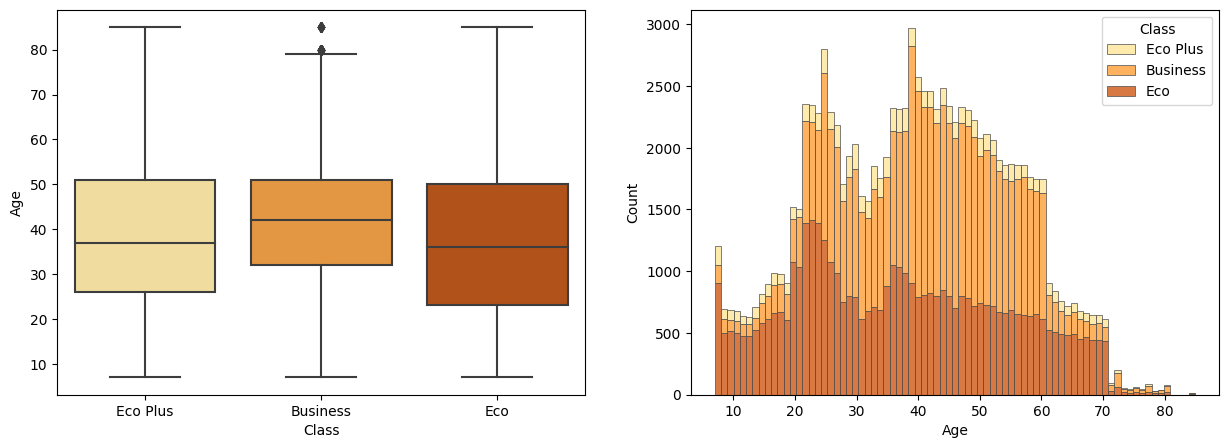

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])

<AxesSubplot:xlabel='Age', ylabel='Count'>

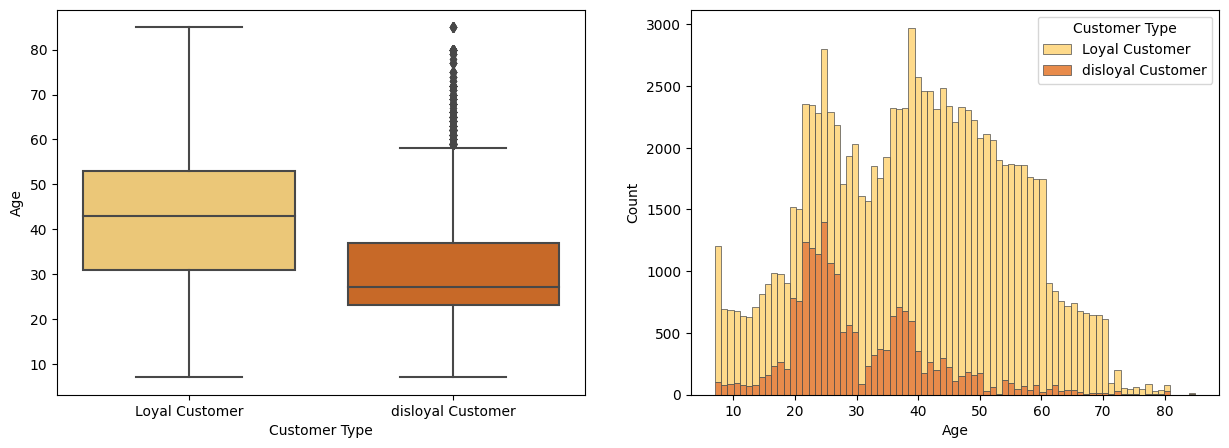

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])

Dari diagram diatas dapat diamati bahwa pelanggan dengan rentang umur 40-60 tahun didominasi oleh pelanggan kelas bisnis dan loyal. <br>

Berikut merupakan perbandingan kolom `Gender` dengan `satisfaction`.

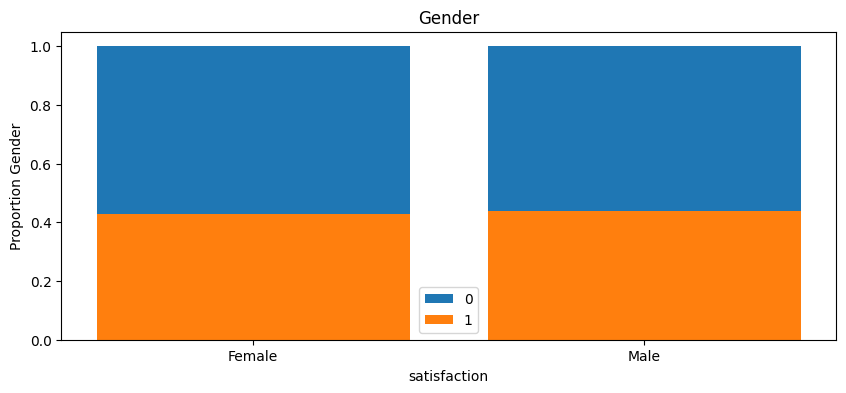

In [ ]:
for i in ['Gender']:
    ct=pd.crosstab(df[i],df['satisfaction'],normalize='index').sort_index()
    ct['total']=ct.sum(axis=1)
    plt.figure(figsize=(10,4))
    plt.bar(np.arange(df[i].nunique()),ct['total'])
    plt.bar(np.arange(df[i].nunique()),ct['satisfied'])
    plt.xlabel('satisfaction')
    plt.ylabel(f'Proportion {i}')
    plt.legend([0,1])
    plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
    plt.title(i)
    plt.show()

In [ ]:
fig=px.sunburst(df,path=['Gender','satisfaction'],color='satisfaction', title=f'Proporsi Kepuasan Pelanggan Berdasarkan gender')
fig.show()

Dari diagram diatas dapat dilihat bahwa jumlah dan proporsi antara gender male dan female cukup seimbang. <br>
Namun, tingkat kepuasan dari kedua gender cenderung lebih rendah dari netral/tidak puas.

<br>

## **Kesimpulan dan Rekomendasi**

## Kesimpulan

Dari analisis yang telah dilakukankita bisa mbuat kesimpulan dari pelanggan yang telah dilakukan survey:
* Dari 103,904 pelanggan yang disurvey terdapat 45,025 atau 43.3% pelanggan yang merasa puas
* Pelanggan yang merasa puas kebanyakan berasal dari jenis pelanggan loyal, perjalanan kelas bisnis dan sedang melakukan perjalanan bisnis.
* Berdasarkan peniaian pelanggan, pelayanan dalam penerbangan dan bagasi merupakan faktor yang memiliki penilaian tertinggi.
* Ketepatan waktu memiliki pengaruh yang besar pada kepuasan pelanggan
* Semakin jauh jarak perjalanan, maka semakin tinggi tingkat kepuasan pelanggan. Hal ini dikarenakan banyaknya pelanggan kelas bisnis yang disurvey, hiburan dalam perjalanan dan ruang kaki.
* Rentang umur pelanggan yang puas berada pada rentang 40-60 tahun dengan didominasi pelanggan loyal dan kelas bisnis.
* Gender pelanggan yang melakukan survey seimbang antara male dan female

Karateristik pelanggan yang puas adalah sebagai berikut:
* Pelanggan loyal
* Pelanggan yang mengambil kelas bisnis
* Pelanggan yang sedang mealkukan perjalanan bisnis
* Pelanggan yang memiliki rentang umur 40-60 tahun
* Pelanggan yang melakukan perjalanan jarak jauh

## Rekomendasi

1. Pelayanan dapat ditingkatkan pada pelanggan kelas ekonomi dan ekonomi plus untuk meningkatkan kepuasan pelanggan.
2. Faktor pelayanan dalam penerbangan serta penanganan bagasi perlu dipertahankan.
3. Ketepatan waktu penerbangan perlu diperhatikan lebih baik.
4. Pelayanan pada jarak perjalanan jauh harus tetap dipertahankan, sedangkan pada perjalanan jarak dekat harus ditingkatkan.
5. Pelayanan pada pelanggan umur 40-60 tahun harus tetap dipertahankan, sedangkan pelayanan pada pelanggan lebih muda harus ditingkatkan
6. Gender tidak perlu menjadi pertimbangan dalam pelayanan

Dengan mengetahui karateristik dari kepuasan pelanggan serta faktor yang mempengaruhi, diharapkan pelayanan dapat dipertahankan atau bakan ditingkatkan. 